# Machine Test Tranzmeo

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Cleaning

In [28]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\temperature.csv")

In [29]:
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


- We take info() for knowing the informartion about the dataset
- There is no missing values in df (temperature) dataset

In [31]:
df.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [32]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

- We convert the "Date" column to datetime format so that we can easily work with dates, like sorting, filtering, and doing date-based calculations.

In [33]:
df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

In [34]:
df['year'] = df['Date'].dt.year
df['month_day'] = df['Date'].dt.strftime('%m-%d')  

- We extract the year and month-day to make it easier to analyze trends, compare data across years, or group data by specific dates.

In [35]:
df_2005_2014  = df[(df['year'] >= 2005) & (df['year'] <= 2014)]

- We filter the data to focus only on records from 2005 to 2014 for analysis.

In [36]:
df_max = df_2005_2014[df['Element'] == 'TMAX']
df_min = df_2005_2014[df['Element'] == 'TMIN']

C:\Users\akash\AppData\Local\Temp\ipykernel_4468\2524541261.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_max = df_2005_2014[df['Element'] == 'TMAX']
C:\Users\akash\AppData\Local\Temp\ipykernel_4468\2524541261.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_min = df_2005_2014[df['Element'] == 'TMIN']


- Separate TMAX and TMIN data to analyze maximum and minimum temperatures separately for better insights.

In [37]:
record_highs = df_max.groupby('month_day')['Data_Value'].max()
record_lows = df_min.groupby('month_day')['Data_Value'].min()

- We do this to find the highest and lowest temperatures recorded for each day of the year, helping us analyze weather patterns.

### 1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

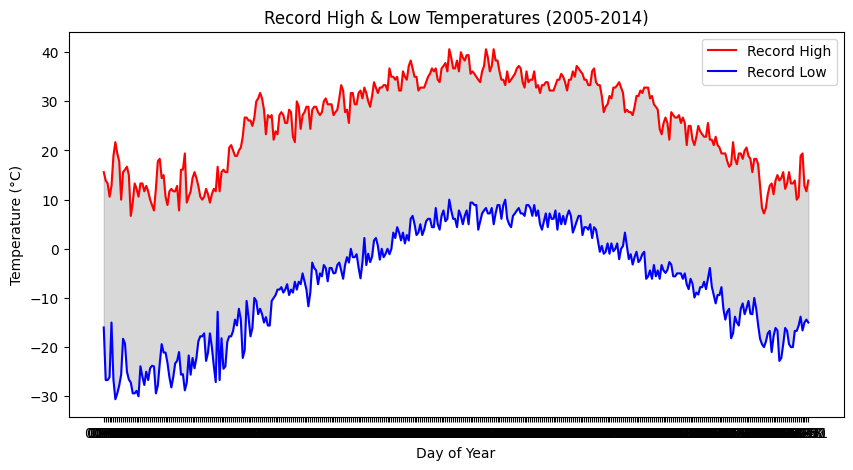

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(record_highs.index, record_highs.values / 10, label="Record High", color='red')
plt.plot(record_lows.index, record_lows.values / 10, label="Record Low", color='blue')
plt.fill_between(record_highs.index, record_lows.values / 10, record_highs.values / 10, color='gray', alpha=0.3)

plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Record High & Low Temperatures (2005-2014)")
plt.legend()
plt.show()

- We do this to visualize the highest and lowest recorded temperatures for each day of the year.
- The shaded area helps show the range between these extremes, making it easier to see temperature variations.

#### Observation from the graph
- Temperature Extremes: The graph shows a wide range of temperatures, with record highs reaching up to around 40°C and record lows dropping to around -30°C, indicating significant temperature variations throughout the year.

- Seasonal Trends: There is a clear seasonal pattern, with higher temperatures (likely in summer) and lower temperatures (likely in winter) occurring at consistent times each year, showing a predictable cycle of temperature changes.

### 2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [40]:
df_2015 = df[df['year'] == 2015]

- Filter the data and keep only the records from the year 2015 for analysis.

In [42]:
df_2015_max = df_2015[df_2015['Element'] == 'TMAX']
df_2015_min = df_2015[df_2015['Element'] == 'TMIN']

- We do this to separate the 2015 data into maximum (TMAX) and minimum (TMIN) temperature records for analysis.

In [44]:
record_breaking_highs = df_2015_max[df_2015_max['Data_Value'] > df_2015_max['month_day'].map(record_highs)]
record_breaking_lows = df_2015_min[df_2015_min['Data_Value'] < df_2015_min['month_day'].map(record_lows)]

This code is to find the days in 2015 when temperatures broke previous record highs or lows.

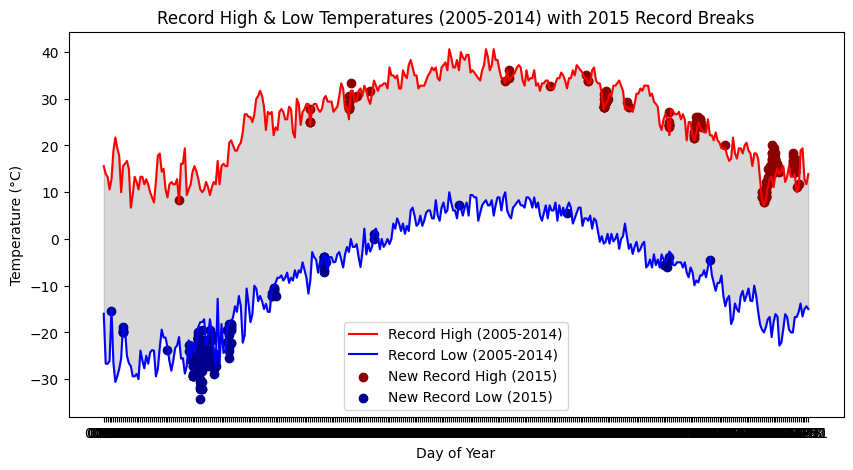

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(record_highs.index, record_highs.values / 10, label="Record High (2005-2014)", color='red')
plt.plot(record_lows.index, record_lows.values / 10, label="Record Low (2005-2014)", color='blue')

plt.fill_between(record_highs.index, record_lows.values / 10, record_highs.values / 10, color='gray', alpha=0.3)
plt.scatter(record_breaking_highs['month_day'], record_breaking_highs['Data_Value'] / 10, color='darkred', label="New Record High (2015)", marker='o')
plt.scatter(record_breaking_lows['month_day'], record_breaking_lows['Data_Value'] / 10, color='darkblue', label="New Record Low (2015)", marker='o')

plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Record High & Low Temperatures (2005-2014) with 2015 Record Breaks")
plt.legend()
plt.show()

- We create this plot to compare past record temperatures (2005-2014) with new record-breaking temperatures in 2015. 
- The red and blue lines show past highs and lows, while dots highlight new records in 2015.

#### Observation from the graph
- New Records in 2015: The graph shows that in 2015, there were new record high and low temperatures that exceeded the previous records set between 2005 and 2014, indicating more extreme temperature conditions.

- Consistent Seasonal Pattern: Despite the new records in 2015, the overall seasonal pattern of higher temperatures in summer and lower temperatures in winter remains consistent with the previous years.


### 3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

In [49]:
# Remove leap day (Feb 29)
df = df[df['month_day'] != '02-29']

In [53]:
df_2005_2014 = df[(df['year'] >= 2005) & (df['year'] <= 2014)]
df_max = df_2005_2014[df_2005_2014['Element'] == 'TMAX']
df_min = df_2005_2014[df_2005_2014['Element'] == 'TMIN']
record_highs = df_max.groupby('month_day')['Data_Value'].max()
record_lows = df_min.groupby('month_day')['Data_Value'].min()
df_2015 = df[df['year'] == 2015]

Rerun the code ,that we write just before

In [55]:
df_2015_max = df_2015[df_2015['Element'] == 'TMAX']
df_2015_min = df_2015[df_2015['Element'] == 'TMIN']

We filter the 2015 data to separate maximum (TMAX) and minimum (TMIN) temperatures so we can compare them with past records.

In [56]:
record_breaking_highs = df_2015_max[df_2015_max['Data_Value'] > df_2015_max['month_day'].map(record_highs)]
record_breaking_lows = df_2015_min[df_2015_min['Data_Value'] < df_2015_min['month_day'].map(record_lows)]

We do this to find the days in 2015 when the temperature was higher or lower than any previous record from 2005-2014.

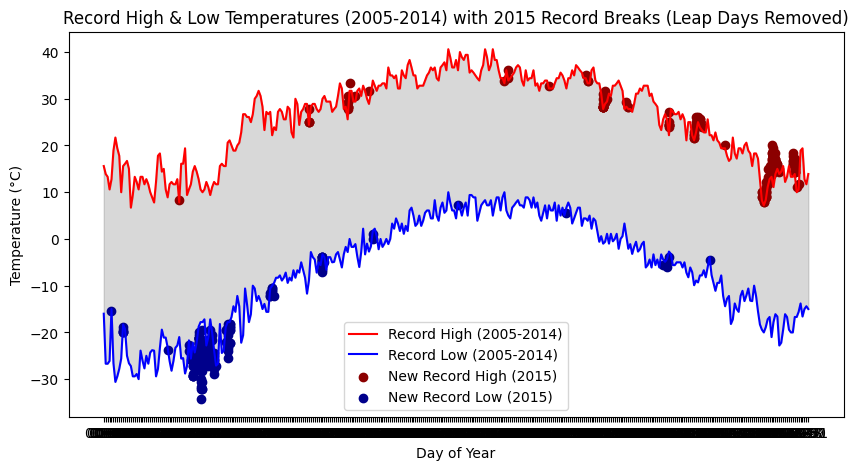

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(record_highs.index, record_highs.values / 10, label="Record High (2005-2014)", color='red')
plt.plot(record_lows.index, record_lows.values / 10, label="Record Low (2005-2014)", color='blue')

plt.fill_between(record_highs.index, record_lows.values / 10, record_highs.values / 10, color='gray', alpha=0.3)
plt.scatter(record_breaking_highs['month_day'], record_breaking_highs['Data_Value'] / 10, color='darkred', label="New Record High (2015)", marker='o')
plt.scatter(record_breaking_lows['month_day'], record_breaking_lows['Data_Value'] / 10, color='darkblue', label="New Record Low (2015)", marker='o')

plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Record High & Low Temperatures (2005-2014) with 2015 Record Breaks (Leap Days Removed)")
plt.legend()
plt.show()

- We create this plot to compare past temperature records (2005-2014) with new record-breaking highs and lows from 2015. 
- The shaded area shows the range of past records, while the dots highlight the new extreme temperatures in 2015.

#### Observation
- Leap Days Removed: In this graph, leap days (February 29) have been removed, which means the data is adjusted to account for the extra day in leap years. This provides a more accurate comparison of temperatures across years without the influence of the extra day.

- Impact on Records: Despite the removal of leap days, the new record highs and lows in 2015 still exceed the previous records from 2005-2014, confirming that 2015 experienced more extreme temperatures regardless of the adjustment. The overall seasonal pattern remains consistent, but the data is now more precise for year-to-year comparisons.

### 4. Consider issues such as legends, labels, and chart junk.

#### Improving the Chart’s Clarity & Readability
To make the visualization clearer and more professional, we should:

1. Improve the Legend & Labels
2. Enhance the X-Axis & Y-Axis
3. Remove Chart Junk (Unnecessary Elements)


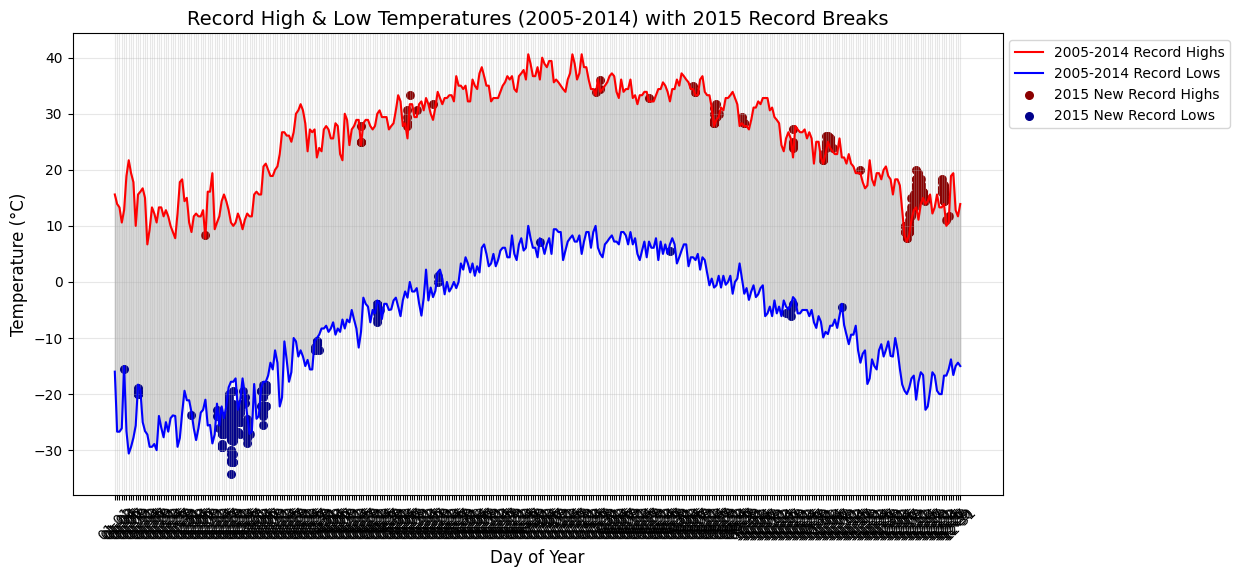

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(record_highs.index, record_highs.values / 10, label="2005-2014 Record Highs", color='red', linewidth=1.5)
plt.plot(record_lows.index, record_lows.values / 10, label="2005-2014 Record Lows", color='blue', linewidth=1.5)

# Shade the area between high and low temperatures
plt.fill_between(record_highs.index, record_lows.values / 10, record_highs.values / 10, color='gray', alpha=0.3)

# Overlay scatter points for 2015 record-breaking values
plt.scatter(record_breaking_highs['month_day'], record_breaking_highs['Data_Value'] / 10, 
            color='darkred', label="2015 New Record Highs", marker='o', s=30)
plt.scatter(record_breaking_lows['month_day'], record_breaking_lows['Data_Value'] / 10, 
            color='darkblue', label="2015 New Record Lows", marker='o', s=30)

# Improve labels & aesthetics
plt.xlabel("Day of Year", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Record High & Low Temperatures (2005-2014) with 2015 Record Breaks", fontsize=14)
plt.xticks(rotation=45)

# Add a legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Add grid for readability
plt.grid(alpha=0.3)

#### Key Enhancements
- Better Legend Placement: Placed outside the chart (bbox_to_anchor=(1,1))
- Thicker Line Widths: linewidth=1.5 for better visibility
- Scatter Point Size Adjusted: s=30 to make them clearer
- Grid Added: plt.grid(alpha=0.3) to make data points easier to compare
- Rotated X-axis Labels: plt.xticks(rotation=45) to avoid clutter
- Removed Unnecessary Borders: plt.gca().spines["top"].set_visible(False)

- These improvements make the chart clearer and more professional by enhancing labels, adjusting the legend, and making data easier to read.
- Now, trends are more visible, and unnecessary elements are removed for a cleaner look.

### 5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

In [65]:
stations_df = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\BinSize.csv")

In [66]:
stations_df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,ZA000067633,-15.250,23.150,1053.0,NaN,MONGU,GSN,NaN,67633.0,2.483523e+06,-1.695725e+06,2480265.1895748563 to 2577598.618291222,-1705072.2452288494 to -1607738.8165124834,"2480265.1895748563 to 2577598.618291222, -1705...",c1f39870d7200ac9fa7748c4d6688cbbe48cd3ac4c4a9e...
18255,ZA000067743,-17.817,25.817,986.0,NaN,LIVINGSTONE,GSN,NaN,67743.0,2.733040e+06,-1.981163e+06,2674932.047007587 to 2772265.4757239525,-1997072.531377945 to -1899739.1026615791,"2674932.047007587 to 2772265.4757239525, -1997...",25cba19cddf24c1999b6b8812cbccbb2fc8f3e64715d73...
18256,ZI000067775,-17.917,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,NaN,67775.0,3.293948e+06,-1.992282e+06,3258932.6193057783 to 3356266.048022144,-1997072.531377945 to -1899739.1026615791,"3258932.6193057783 to 3356266.048022144, -1997...",6c7f11051d64bc4f778b4d2417b11ec72b4f655aed5fea...
18257,ZI000067975,-20.067,30.867,1095.0,NaN,MASVINGO,NaN,NaN,67975.0,3.223893e+06,-2.231352e+06,3161599.190589413 to 3258932.6193057788,-2289072.817527041 to -2191739.388810675,"3161599.190589413 to 3258932.6193057788, -2289...",1d695305fb4a37e8903ca1b196f14d940b84cbc1c31d4b...


In [68]:
stations_df.isnull().sum()

ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64

To see the missing Values

In [69]:
# Approximate coordinates for Ann Arbor, Michigan
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430

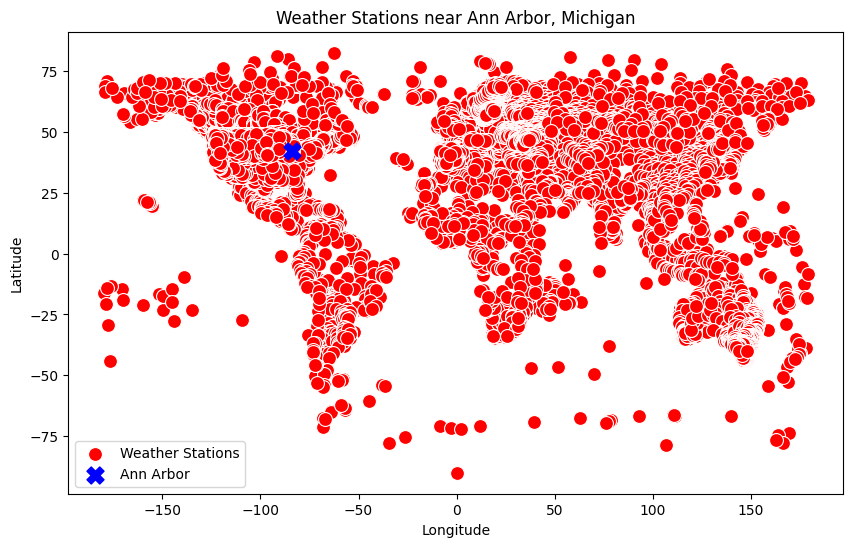

In [70]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot station locations
sns.scatterplot(x=stations_df["LONGITUDE"], y=stations_df["LATITUDE"], 
                color='red', s=100, label="Weather Stations")

# Highlight Ann Arbor
plt.scatter(ann_arbor_lon, ann_arbor_lat, color='blue', s=150, label="Ann Arbor", marker='X')

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Weather Stations near Ann Arbor, Michigan")

# Show legend
plt.legend()

# Show plot
plt.show()

- This code creates a map showing weather station locations using their latitude and longitude, with Ann Arbor highlighted separately. 
- It helps visualize where the stations are located and their relation to Ann Arbor.

#### Observation
- Location of Weather Stations: The graph shows the locations of various weather stations near Ann Arbor, Michigan, plotted by their latitude and longitude. Ann Arbor is marked separately, and the stations are spread out around it.

- Geographical Spread: The weather stations cover a wide range of latitudes and longitudes, indicating that they are distributed across a broad area around Ann Arbor, which helps in gathering diverse weather data for the region.



### 6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

In [76]:
df_2015 = df[df['Date'].dt.year == 2015]
df_2015['Data_Value'] = df_2015['Data_Value'] / 10.0

C:\Users\akash\AppData\Local\Temp\ipykernel_4468\2722259178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Data_Value'] = df_2015['Data_Value'] / 10.0


We filter the data for the year 2015 and convert the temperature values to a proper scale (e.g., tenths of degrees to degrees) for accurate analysis.

In [80]:
ann_arbor_stations = stations_df[stations_df['NAME'].str.contains("ANN ARBOR", na=False, case=False)]
df_2015_ann_arbor = df_2015[df_2015['ID'].isin(ann_arbor_stations['ID'])]

We do this to find weather stations in Ann Arbor and filter the 2015 weather data for those stations.

In [82]:
df_tmax = df_2015_ann_arbor[df_2015_ann_arbor['Element'] == "TMAX"]
df_tmin = df_2015_ann_arbor[df_2015_ann_arbor['Element'] == "TMIN"]

We separate TMAX and TMIN to analyze high and low temperatures separately for better clarity and comparison.

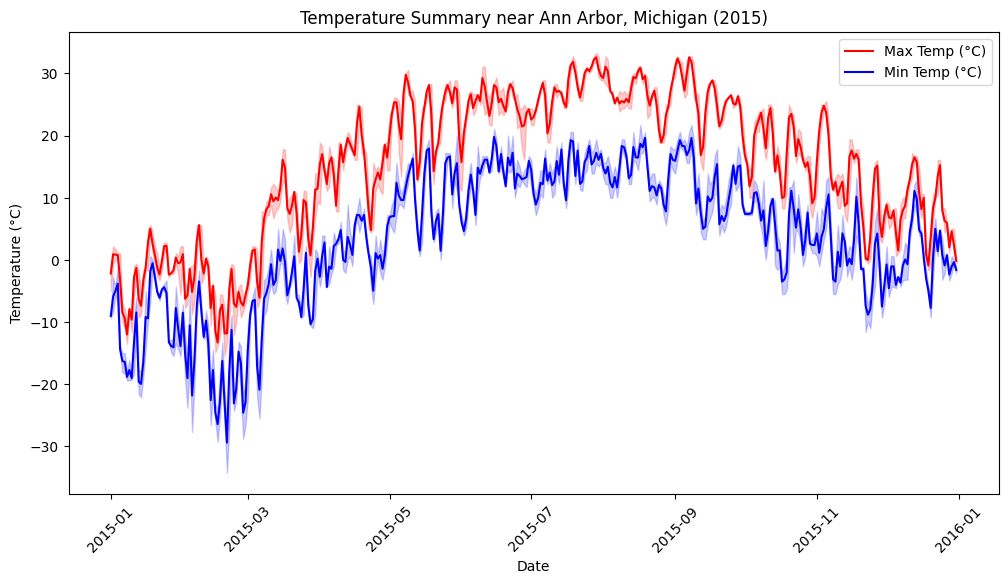

In [84]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=df_tmax['Date'], y=df_tmax['Data_Value'], label="Max Temp (°C)", color="red")
sns.lineplot(x=df_tmin['Date'], y=df_tmin['Data_Value'], label="Min Temp (°C)", color="blue")

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Summary near Ann Arbor, Michigan (2015)")
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

- This code creates a line chart showing the highest and lowest temperatures over time near Ann Arbor in 2015.
- It helps visualize temperature trends and seasonal variations throughout the year.

#### Observation
- Temperature Fluctuations: The graph shows the daily temperature variations near Ann Arbor, Michigan, in May 2015. The temperatures range from around -10°C to 30°C, indicating significant fluctuations between the minimum and maximum temperatures.

- General Trend: Despite the daily fluctuations, there is a general trend of increasing temperatures as the month progresses, suggesting a transition towards warmer weather as May advances.